In [1]:
import pandas as pd
import numpy as np
xl = pd.ExcelFile("SELF-19712 - Monthly pull by trim.xlsx")
df = xl.parse("Sheet1")
Dates = ["2020-05-01", "2020-06-01", "2020-07-01", "2020-08-01", "2020-09-01", "2020-10-01", "2020-11-01",
        "2020-12-01", "2021-01-01", "2021-02-01", "2021-03-01", "2021-04-01"]

In [31]:
df.loc[(df["ModelName"] == "Model 3")]

,ReportDate,ModelYear,DivisionName,ModelName,Trim,StockType,vehicleCount,totalPrice,avgPriceCount,avgPrice
4137,2020-01-01,2017,Tesla,Model 3,Long Range,used,3,116968,3,38989.333333
4138,2020-01-01,2017,Tesla,Model 3,Standard,used,1,38888,1,38888.000000
5718,2020-01-01,2018,Tesla,Model 3,Long Range Battery,used,39,1703544,38,44830.105263
5719,2020-01-01,2018,Tesla,Model 3,Mid Range Battery,used,26,1076206,25,43048.240000
5720,2020-01-01,2018,Tesla,Model 3,Performance,used,7,390903,7,55843.285714
...,...,...,...,...,...,...,...,...,...,...
238188,2021-04-01,2020,Tesla,Model 3,Performance,used,19,839455,16,52465.937500
238189,2021-04-01,2020,Tesla,Model 3,Standard Range,used,19,687218,17,40424.588235
238190,2021-04-01,2020,Tesla,Model 3,Standard Range Plus,used,24,862487,21,41070.809524
239385,2021-04-01,2021,Tesla,Model 3,Long Range,used,2,108290,2,54145.000000


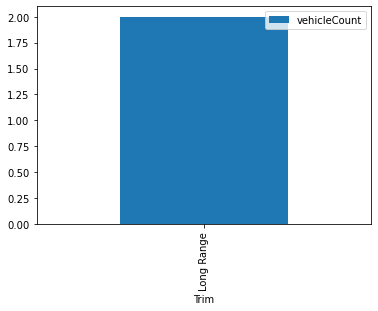

In [32]:
Model32017TrimCheck = df.loc[(df['ReportDate'] == "2020-05-01") & (df['ModelYear'] == 2017) & (df["DivisionName"] == "Tesla") & (df["ModelName"] == "Model 3")]
Model32017TrimCheck.plot.bar(x='Trim', y='vehicleCount')

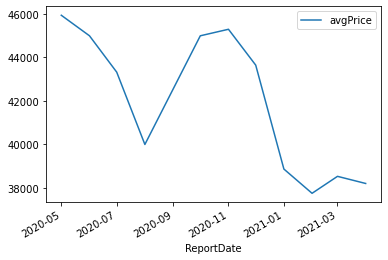

In [33]:
Model32017 = df.loc[(df['ReportDate'].isin(Dates)) & (df['ModelYear'] == 2017) & (df["DivisionName"] == "Tesla") & (df["ModelName"] == "Model 3") & (df["Trim"] == "Long Range")]
Model32017.plot.line(x='ReportDate', y='avgPrice')

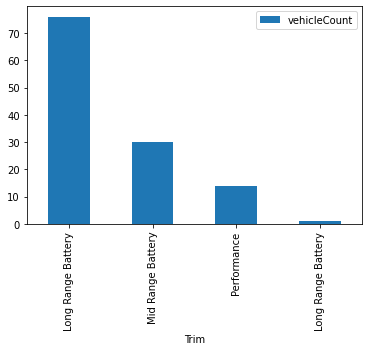

In [34]:
Model32018TrimCheck = df.loc[(df['ReportDate'] == "2020-05-01") & (df['ModelYear'] == 2018) & (df["DivisionName"] == "Tesla") & (df["ModelName"] == "Model 3")]
Model32018TrimCheck.plot.bar(x='Trim', y='vehicleCount')

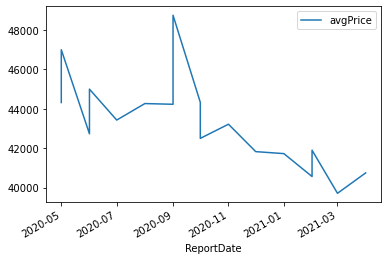

In [35]:
Model32018 = df.loc[(df['ReportDate'].isin(Dates)) & (df['ModelYear'] == 2018) & (df["DivisionName"] == "Tesla") & (df["ModelName"] == "Model 3") & (df["Trim"] == "Long Range Battery")]
Model32018.plot.line(x='ReportDate', y='avgPrice')

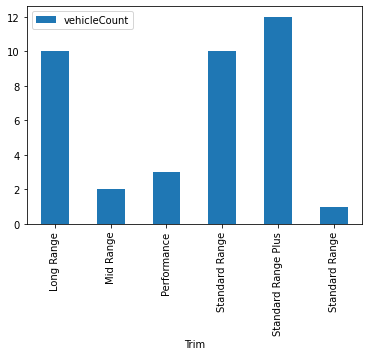

In [36]:
Model32019TrimCheck = df.loc[(df['ReportDate'] == "2020-01-01") & (df['ModelYear'] == 2019) & (df["DivisionName"] == "Tesla") & (df["ModelName"] == "Model 3")]
Model32019TrimCheck.plot.bar(x='Trim', y='vehicleCount')

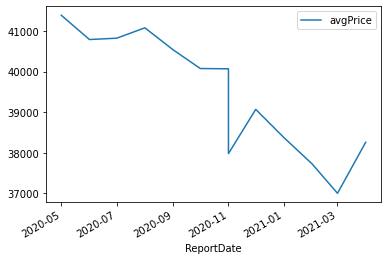

In [37]:
Model32019 = df.loc[(df['ReportDate'].isin(Dates)) & (df['ModelYear'] == 2019) & (df["DivisionName"] == "Tesla") & (df["ModelName"] == "Model 3") & (df["Trim"] == "Standard Range Plus")]
Model32019.plot.line(x='ReportDate', y='avgPrice')

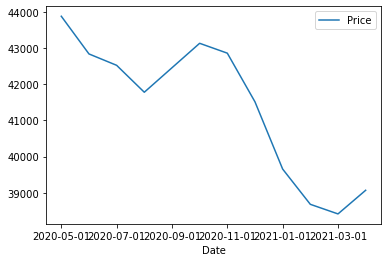

In [12]:
import numpy as np
l = []
last2017 = 0
last2018 = 0
last2019 = 0
for D in Dates:
    num2017 = 0;
    num2018 = 0;
    num2019 = 0;
    if D == "2020-09-01":
        num2017 += (last2017 + Model32017.loc[(df['ReportDate'] == "2020-10-01")]['avgPrice'].iloc[0]) / 2
        num2018 += (last2018 + Model32018.loc[(df['ReportDate'] == "2020-10-01")]['avgPrice'].iloc[0]) / 2
        num2019 += (last2019 + Model32019.loc[(df['ReportDate'] == "2020-10-01")]['avgPrice'].iloc[0]) / 2
    else:
        num2017 = Model32017.loc[(df['ReportDate'] == D)]['avgPrice'].iloc[0]
        last2017 = num2017
        num2018 = Model32018.loc[(df['ReportDate'] == D)]['avgPrice'].iloc[0]
        last2018 = num2018
        num2019 = Model32019.loc[(df['ReportDate'] == D)]['avgPrice'].iloc[0]
        last2019 = num2019
    l += [np.average([num2017, num2018, num2019])]

data = {'Date': Dates,
        'Price': l}
Model3 = pd.DataFrame(data)  

Model3.plot.line(x='Date', y='Price')

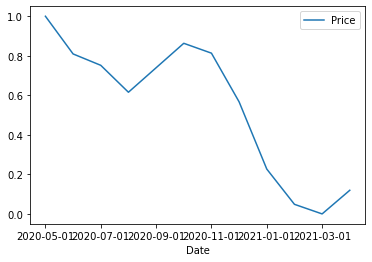

In [14]:
maximum = max(l)
minimum = min(l)
standard = []
for val in l:
    standardized = (val - minimum) / (maximum - minimum)
    standard += [standardized]
data = {'Date': Dates,
        'Price': standard}
Model3 = pd.DataFrame(data)  

Model3.plot.line(x='Date', y='Price')  